<a href="https://colab.research.google.com/github/Jose-Carlos-OA/Red-N/blob/main/Mi_Primer_Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

# Keras
La biblioteca Keras es una biblioteca de alto nivel para el aprendizaje profundo (deep learning) escrita en Python. Proporciona una interfaz fácil de usar y modular para la construcción, entrenamiento y evaluación de modelos de redes neuronales. Keras se ejecuta en la parte superior de otros frameworks de aprendizaje automático, como TensorFlow o Theano, lo que facilita la implementación de redes neuronales y experimentos de aprendizaje profundo.

Estas son algunas de las funcionalidades y usos principales de la biblioteca Keras:

Construcción de modelos de redes neuronales: Keras permite crear modelos de redes neuronales de manera fácil y rápida. Proporciona una API de alto nivel con una sintaxis sencilla para definir capas, conexiones y configuraciones de modelos. Puedes construir redes neuronales secuenciales (donde las capas se apilan una encima de la otra) o modelos más complejos con múltiples entradas y salidas.

Entrenamiento de modelos: Keras ofrece una interfaz intuitiva para entrenar modelos de redes neuronales. Puedes especificar el algoritmo de optimización, la función de pérdida y las métricas que deseas utilizar. Keras se encarga de manejar los cálculos de propagación hacia atrás (backpropagation) y actualización de pesos automáticamente. También puedes configurar el proceso de entrenamiento con opciones como el tamaño del lote (batch size), el número de épocas (epochs) y la validación cruzada (cross-validation).

Implementación de diferentes tipos de redes neuronales: Keras admite una amplia gama de arquitecturas de redes neuronales, incluyendo redes neuronales convolucionales (CNN), redes neuronales recurrentes (RNN), redes neuronales generativas adversarias (GAN), redes neuronales siamesas, entre otras. Estas arquitecturas son ampliamente utilizadas en tareas de visión por computadora, procesamiento de lenguaje natural, reconocimiento de voz y otras aplicaciones de aprendizaje profundo.

Transferencia de aprendizaje y reutilización de modelos: Keras facilita la transferencia de aprendizaje, lo que te permite aprovechar modelos pre-entrenados en conjuntos de datos grandes y aplicarlos a tareas relacionadas o con recursos limitados. Puedes importar modelos pre-entrenados populares, como VGG16, ResNet, Inception, y utilizarlos como base para tu propio modelo.

Evaluación y predicción: Después de entrenar un modelo, Keras proporciona funciones para evaluar su rendimiento en datos de prueba y realizar predicciones en nuevos datos. Puedes calcular métricas de evaluación, como precisión, recall y F1-score, y utilizar el modelo entrenado para realizar inferencias en tiempo real.

#Las librerias usadas y modulos importados:

from keras import layers, models

layers es un módulo de Keras que contiene diversas clases y funciones para definir y configurar capas de redes neuronales. Al importarlo, tendrás acceso a capas como Dense, Conv2D, LSTM, etc., que se utilizan para construir diferentes tipos de redes neuronales.
models es otro módulo de Keras que contiene clases y funciones para crear y entrenar modelos de redes neuronales. Al importarlo, podrás utilizar clases como Sequential o Model para construir tus modelos de aprendizaje profundo.
from keras.utils import to_categorical

to_categorical es una función en Keras que se utiliza para convertir variables categóricas (etiquetas) en forma de números enteros en representación one-hot. Esta función es útil cuando trabajas con tareas de clasificación y necesitas transformar las etiquetas en un formato adecuado para entrenar y evaluar modelos de redes neuronales.
from keras.datasets import mnist

mnist es un módulo en Keras que proporciona una interfaz para cargar y acceder al popular conjunto de datos MNIST. MNIST es un conjunto de imágenes en blanco y negro de dígitos escritos a mano, ampliamente utilizado como punto de referencia en el campo del aprendizaje automático. Importando este módulo, podrás cargar el conjunto de datos MNIST y utilizarlo para entrenar y evaluar modelos de clasificación de dígitos escritos a mano.

In [ ]:
#Para cargar los datos con queras vamos a hacer lo siguiente
(train_data, train_label), (test_data, test_label) = mnist.load_data()

In [ ]:
#Vamos a visualizar que información se descargo
train_data
train_label
#Las matrices presentadas en train_data son imagenes, y con .shape podemos ver que son 60,000 imagenes de 28 por 28 pixeles
train_data.shape

(60000, 28, 28)

In [ ]:
#Seleccionando la primer imagen de esas 60000, son numeros del 0 al 255.
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

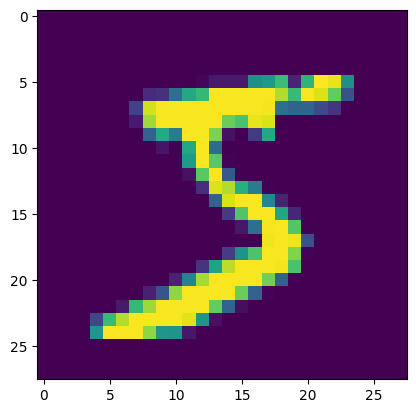

In [ ]:
#Podemos pasarla a imagen con el siguiente codigo:
plt.imshow(train_data[0])

In [ ]:
#El train_label, lo que nos indica es el numero que esta escrito en la imagen de la misma posición.
train_label[0]

5

In [ ]:
#Nuestro modelo de red neuronal secuencial.
model = models.Sequential()
#Ahora le agregaremos capas: el 512 son las neuronas que va a tener nuestra capa, lo siguiente es la funcion activación y por ultimo el formato
model.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
#Ahora agregaremos una nueva capa a la red pero ahora de 10 neuronas, ya que son 10 posibles datos de salida:
model.add(layers.Dense(10, activation = 'softmax'))
#Hasta aqui ya quedaria la aruitectura de la red neuronal, la activación, el porque usamos relu y softmax es algo que veremos un poco mas adelante.


In [ ]:
#Lo siguiente que se va a hacer es compilar la red neuronal de la siguiente manrea
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = 'accurancy')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Ahora haciendo un reacomodo en nuestros datos de entrada, les cambiaremos la forma, para que en lugar de tener 3 dimensiones tengamos 2:
x_train = train_data.reshape((60000, 28*28))
#Como podemos ver en lugar de tener una dimension de 60000 y dos de 28 tenemos solo una de 60000 y una de 28*28 y esto se hace para facilitar el uso de las redes neuronales.
#enseguida vamos a transformar nuestros datos a flotantes y los normalizaremos, como el 255 es nuestro mayor dato en la matriz, por ello, lo dividimos entre eso.
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000, 28*28))
x_test = x_test.astype('float32')/255

In [ ]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
#A continuación transformamos nuestros datos para poder tener un mejr entrenamiento, sabiamos que train_label nos arrojaba un 5 en la posicion cero.
#Lo que ahora nos va a arrojar sera un vector de ceros excepto en la posicion que represente el 5.
y_train = to_categorical(train_label)
y_test = to_categorical(test_label)


In [ ]:
y_train[0]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Hasta aqui adaptamos los datos para que fueran mas efectivos para la red neuronal, a continuación entrenaremos nuestra red.


In [ ]:
#Con el siguiente codigo se entrenara la red; epochs sirve para decirle cuantas veces vamos a iterar y batch_size: son la cantidades de batches o cantidad de byas.
#model.fit(x_train, y_train, epochs = 5, batch_size = 128)
model.fit(x_train, y_train, epochs = 5, batch_size = 128)

Epoch 1/5


TypeError: ignored